## Import Library

In [3]:
# Mengimport modul
!pip install scikit-learn
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Pada tahap awal, diimport seluruh library yang dibutuhkan.

## Load Data

In [4]:
# Load data
df = pd.read_csv('student.csv')
df.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Scholarship holder,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),Admission grade,Displaced,Previous qualification (grade),Curricular units 2nd sem (evaluations),Application order,Daytime/evening attendance\t,Curricular units 2nd sem (credited),Curricular units 1st sem (credited),Curricular units 1st sem (evaluations),GDP,Course,Target
0,0,0.000000,0,0.000000,1,0,0,0,127.3,1,122.0,0,5,1,0,0,0,1.74,171,Dropout
1,6,13.666667,6,14.000000,0,0,6,6,142.5,1,160.0,6,1,1,0,0,6,0.79,9254,Graduate
2,0,0.000000,0,0.000000,0,0,6,6,124.8,1,122.0,0,5,1,0,0,0,1.74,9070,Dropout
3,5,12.400000,6,13.428571,1,0,6,6,119.6,1,122.0,10,2,1,0,0,8,-3.12,9773,Graduate
4,6,13.000000,5,12.333333,1,0,6,6,141.5,0,100.0,6,1,0,0,0,9,0.79,8014,Graduate


Pada tahap ini, dataset bernama student.csv diload menggunakan pandas, dan disimpan ke variable df

## Data Understanding

In [5]:
# Menampilkan 5 data teratas
print("Data sample:")
df

Data sample:


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Scholarship holder,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),Admission grade,Displaced,Previous qualification (grade),Curricular units 2nd sem (evaluations),Application order,Daytime/evening attendance\t,Curricular units 2nd sem (credited),Curricular units 1st sem (credited),Curricular units 1st sem (evaluations),GDP,Course,Target
0,0,0.000000,0,0.000000,1,0,0,0,127.3,1,122.0,0,5,1,0,0,0,1.74,171,Dropout
1,6,13.666667,6,14.000000,0,0,6,6,142.5,1,160.0,6,1,1,0,0,6,0.79,9254,Graduate
2,0,0.000000,0,0.000000,0,0,6,6,124.8,1,122.0,0,5,1,0,0,0,1.74,9070,Dropout
3,5,12.400000,6,13.428571,1,0,6,6,119.6,1,122.0,10,2,1,0,0,8,-3.12,9773,Graduate
4,6,13.000000,5,12.333333,1,0,6,6,141.5,0,100.0,6,1,0,0,0,9,0.79,8014,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,5,12.666667,5,13.600000,1,0,6,6,122.2,0,125.0,8,6,1,0,0,7,-4.06,9773,Graduate
3626,2,11.000000,6,12.000000,0,0,6,6,119.0,1,120.0,6,2,1,0,0,6,2.02,9773,Dropout
3627,1,13.500000,7,14.912500,1,1,8,7,149.5,1,154.0,9,1,1,0,0,8,0.79,9500,Dropout
3628,5,12.000000,5,13.800000,1,1,5,5,153.8,1,180.0,6,1,1,0,0,5,-3.12,9147,Graduate


In [6]:
# Salin dataframe
df_decode = df.copy()

# Decode fitur kategorikal
df_decode['Daytime/evening attendance\t'] = df_decode['Daytime/evening attendance\t'].replace({1: 'Daytime', 0: 'Evening'})
df_decode['Displaced'] = df_decode['Displaced'].replace({1: 'Yes', 0: 'No'})
df_decode['Scholarship holder'] = df_decode['Scholarship holder'].replace({1: 'Yes', 0: 'No'})
df_decode['Tuition fees up to date'] = df_decode['Tuition fees up to date'].replace({1: 'Yes', 0: 'No'})

# Tampilkan 5 baris awal untuk memastikan
df_decode.head()


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Scholarship holder,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),Admission grade,Displaced,Previous qualification (grade),Curricular units 2nd sem (evaluations),Application order,Daytime/evening attendance\t,Curricular units 2nd sem (credited),Curricular units 1st sem (credited),Curricular units 1st sem (evaluations),GDP,Course,Target
0,0,0.000000,0,0.000000,Yes,No,0,0,127.3,Yes,122.0,0,5,Daytime,0,0,0,1.74,171,Dropout
1,6,13.666667,6,14.000000,No,No,6,6,142.5,Yes,160.0,6,1,Daytime,0,0,6,0.79,9254,Graduate
2,0,0.000000,0,0.000000,No,No,6,6,124.8,Yes,122.0,0,5,Daytime,0,0,0,1.74,9070,Dropout
3,5,12.400000,6,13.428571,Yes,No,6,6,119.6,Yes,122.0,10,2,Daytime,0,0,8,-3.12,9773,Graduate
4,6,13.000000,5,12.333333,Yes,No,6,6,141.5,No,100.0,6,1,Evening,0,0,9,0.79,8014,Graduate


Pada tahap ini dilakukan decode, untuk menampilkan arti dari setiap data yang tersedia, dikarenakan dataset sudah tersedia dalam bentuk yang sudah diencode, dilakukan decode untuk memahami data secara menyeluruh.

In [7]:
# Menampilkan informasi umum dataset
print("\nInformasi dataset:")
df.info()



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Curricular units 2nd sem (approved)     3630 non-null   int64  
 1   Curricular units 2nd sem (grade)        3630 non-null   float64
 2   Curricular units 1st sem (approved)     3630 non-null   int64  
 3   Curricular units 1st sem (grade)        3630 non-null   float64
 4   Tuition fees up to date                 3630 non-null   int64  
 5   Scholarship holder                      3630 non-null   int64  
 6   Curricular units 2nd sem (enrolled)     3630 non-null   int64  
 7   Curricular units 1st sem (enrolled)     3630 non-null   int64  
 8   Admission grade                         3630 non-null   float64
 9   Displaced                               3630 non-null   int64  
 10  Previous qualification (grade)          

Dataset ini memiliki 3.630 baris dan 20 kolom, yang berarti terdiri dari 3.630 entri atau sampel data dan 20 fitur (variabel) yang masing-masing merepresentasikan atribut dari setiap entri. Setiap kolom dalam dataset ini tidak memiliki nilai kosong (null), sehingga data bersih dan siap untuk tahap pemrosesan berikutnya. Tipe data dalam fitur bervariasi, mulai dari int64 untuk data numerik diskret, float64 untuk data numerik kontinu, hingga object untuk kategori target. Fitur-fitur yang tersedia mencakup nilai akademik mahasiswa, status beasiswa, kehadiran, hingga variabel target yang menunjukkan output yang ingin diprediksi oleh model machine learning.

In [8]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
df.describe()



Statistik deskriptif:


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Scholarship holder,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),Admission grade,Displaced,Previous qualification (grade),Curricular units 2nd sem (evaluations),Application order,Daytime/evening attendance\t,Curricular units 2nd sem (credited),Curricular units 1st sem (credited),Curricular units 1st sem (evaluations),GDP,Course
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,4.518457,10.036155,4.791460,10.534860,0.866116,0.266942,6.296419,6.337466,127.293939,0.549036,132.920606,7.763085,1.750138,0.887603,0.581818,0.754270,8.071074,-0.009256,8853.980992
std,3.162376,5.481742,3.237845,5.057694,0.340575,0.442423,2.263020,2.570773,14.611295,0.497658,13.238373,3.964163,1.333831,0.315897,2.022688,2.477277,4.286632,2.259986,2068.760082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.060000,33.000000
25%,2.000000,10.517857,3.000000,11.000000,1.000000,0.000000,5.000000,5.000000,118.000000,0.000000,125.000000,6.000000,1.000000,1.000000,0.000000,0.000000,6.000000,-1.700000,9085.000000
50%,5.000000,12.333333,5.000000,12.341429,1.000000,0.000000,6.000000,6.000000,126.500000,1.000000,133.100000,8.000000,1.000000,1.000000,0.000000,0.000000,8.000000,0.320000,9254.000000
75%,6.000000,13.500000,6.000000,13.500000,1.000000,1.000000,7.000000,7.000000,135.100000,1.000000,140.000000,10.000000,2.000000,1.000000,0.000000,0.000000,10.000000,1.790000,9556.000000
max,20.000000,18.571429,26.000000,18.875000,1.000000,1.000000,23.000000,26.000000,190.000000,1.000000,190.000000,33.000000,6.000000,1.000000,19.000000,20.000000,45.000000,3.510000,9991.000000


Pada tahap ini dilakukan describe data set, untuk mendapatkan informasi data seperti minimum, maximum, mean, hingga total data.

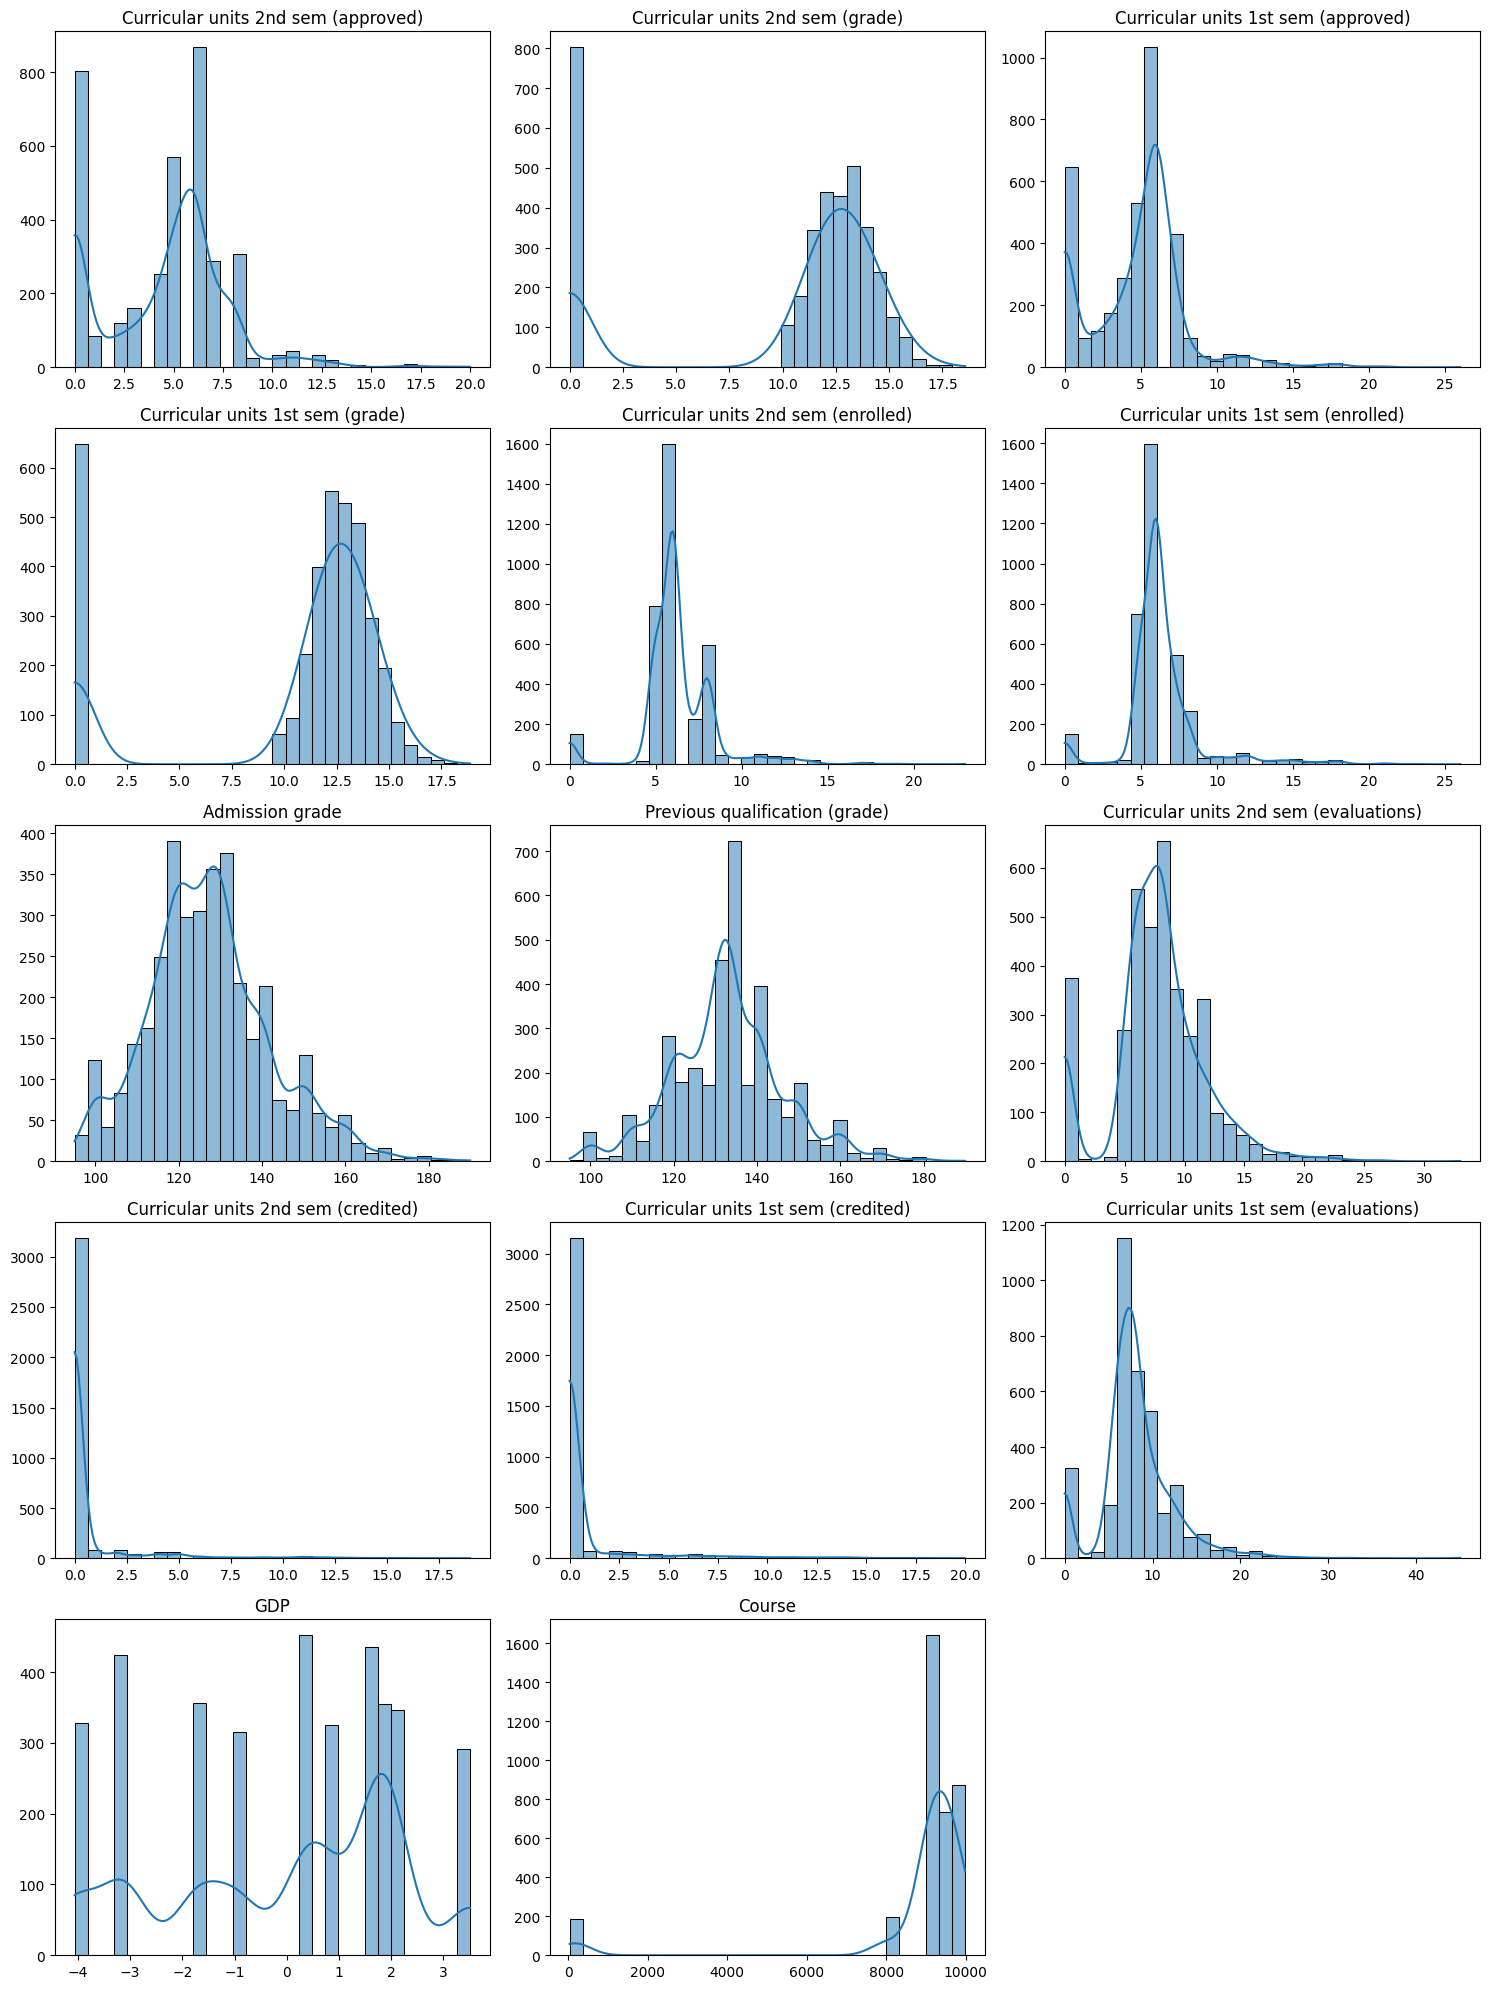

In [9]:
# Visualisasi distribusi fitur numerik
numerical_cols = [col for col in df.columns if col not in [
    'Tuition fees up to date',
    'Scholarship holder',
    'Displaced',
    'Application order',
    'Daytime/evening attendance\t',
    'Target'
]]

n = len(numerical_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.savefig('distribusi_numerik_new.png', dpi=300)
plt.show()


Pada tahap ini dilakukan visualisasi data, untuk mendapatkan informasi distribusi data dari setiap fitur numerical.

<ipython-input-10-8e6295d36cf8>:25: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-8e6295d36cf8>:26: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig('distribusi_kategorikal.png', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


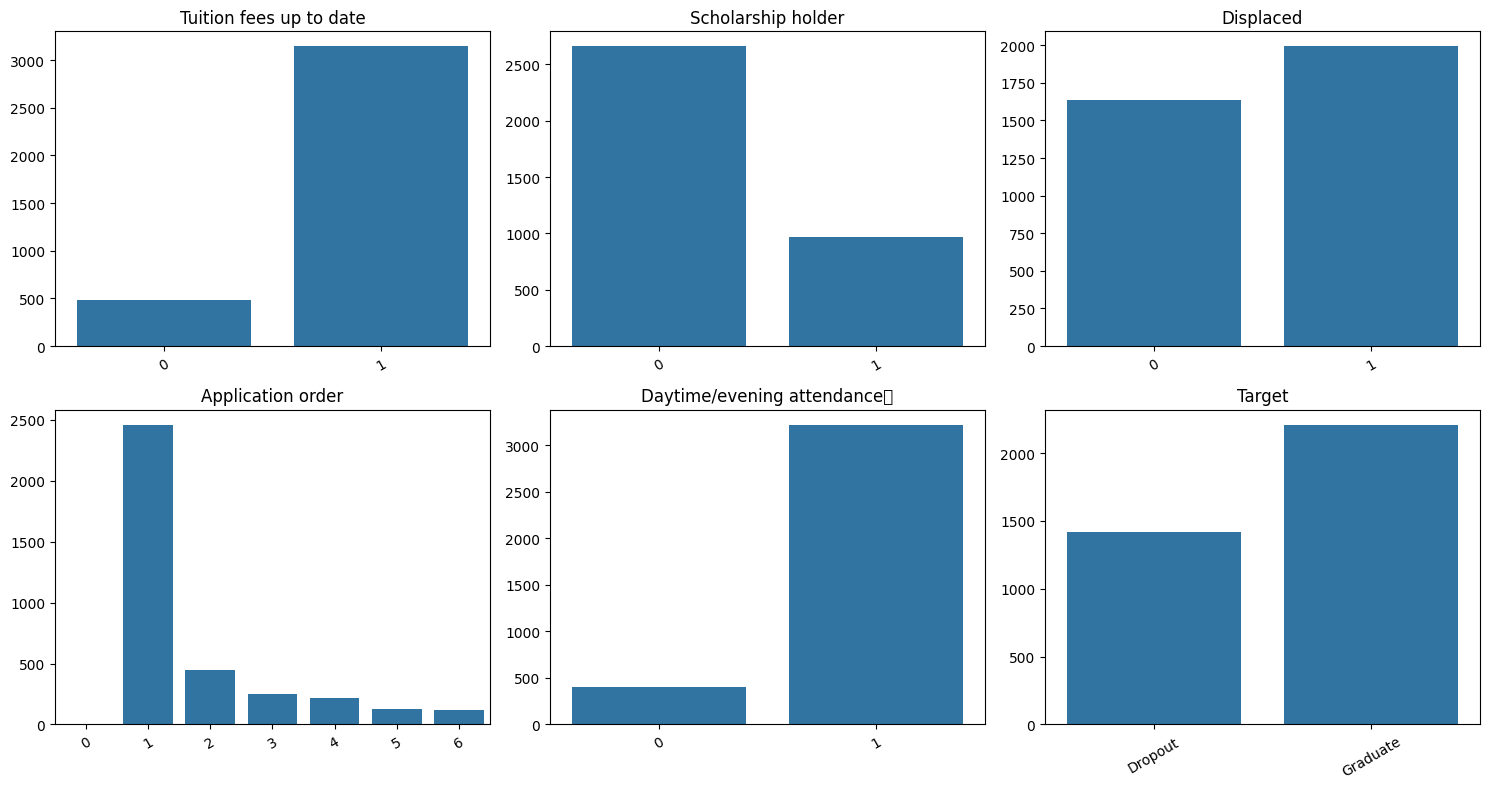

In [10]:
# Visualisasi distribusi fitur kategorikal
categorical_cols = [
    'Tuition fees up to date',
    'Scholarship holder',
    'Displaced',
    'Application order',
    'Daytime/evening attendance\t',
    'Target'
]

n = len(categorical_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig('distribusi_kategorikal.png', dpi=300)
plt.show()


Pada tahap ini dilakukan visualisasi distribusi data kategorikal.

### Exploration Data Analysis

Cek Korelasi Antar Fitur

<ipython-input-11-13a652f35e48>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Target'] = df_encoded['Target'].replace({'Graduate': 1, 'Dropout': 0})
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


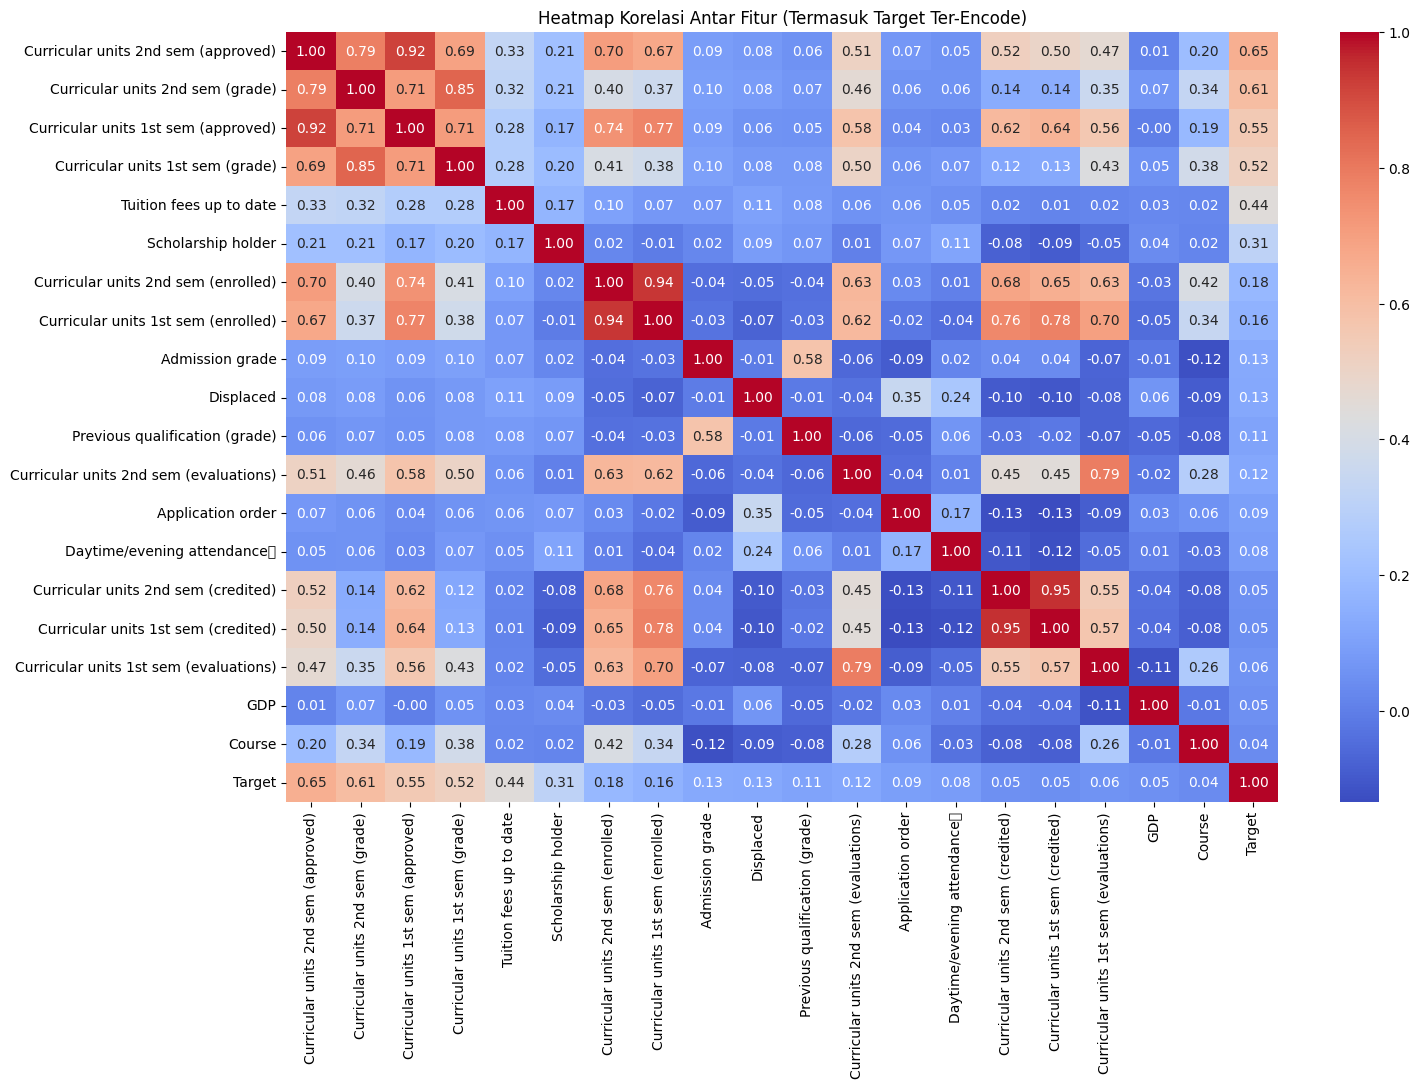

In [11]:
df_encoded = df.copy()

# Encode Target: Graduate = 1, Dropout = 0
df_encoded['Target'] = df_encoded['Target'].replace({'Graduate': 1, 'Dropout': 0})

# Korelasi dan visualisasi heatmap
plt.figure(figsize=(16, 10))
correlation = df_encoded.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur (Termasuk Target Ter-Encode)")
plt.show()


Pada tahap ini dilakukan visualisasi confusion matrix dari seluruh fitur yang ada, untuk mengetahui hubungan antara satu fitur dengan yang lain, dan mendapatkan insight fitur mana yang terkait cukup kuat satu sama lain.

Distribusi Fitur Numerik Berdasarkan Target

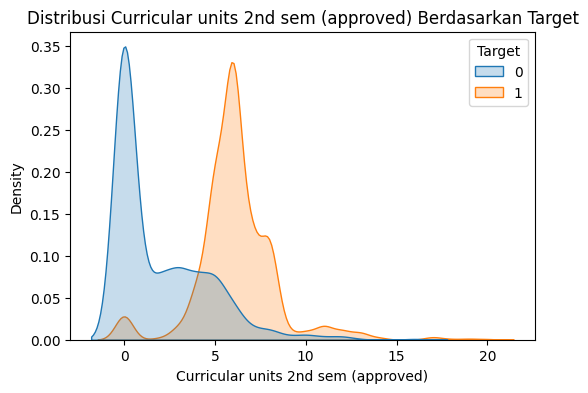

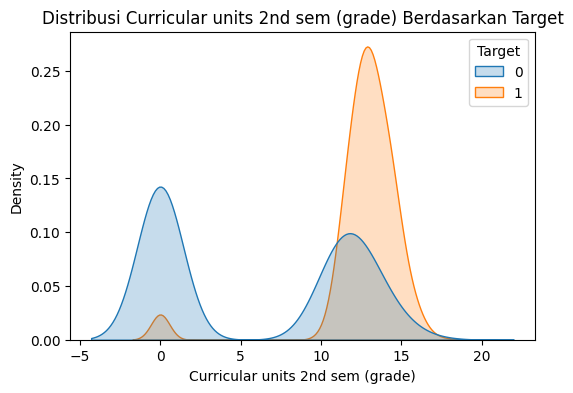

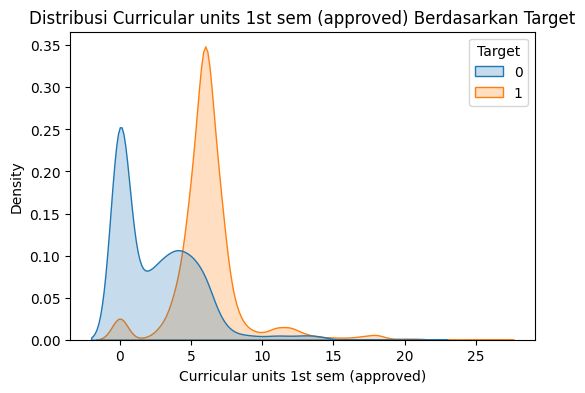

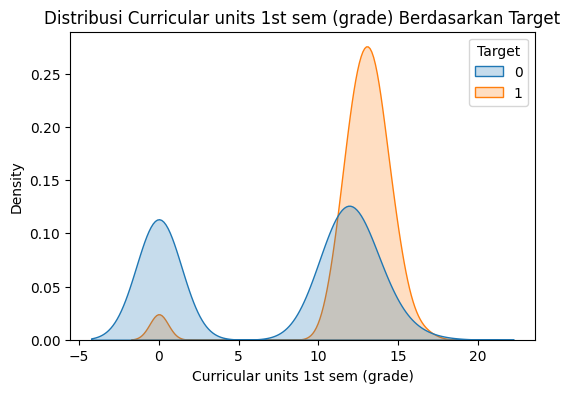

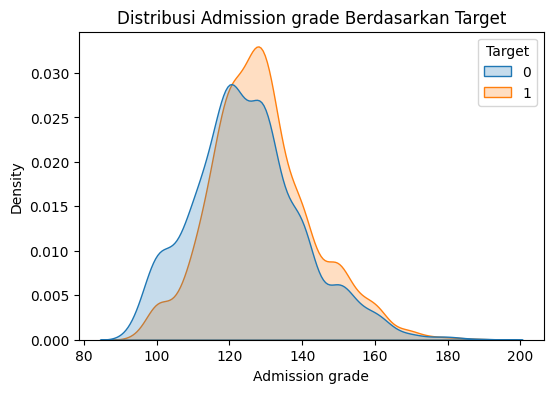

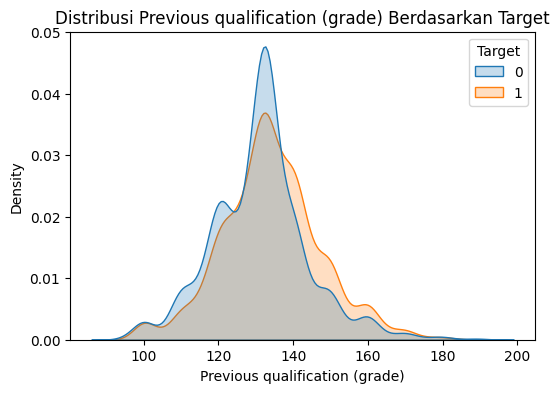

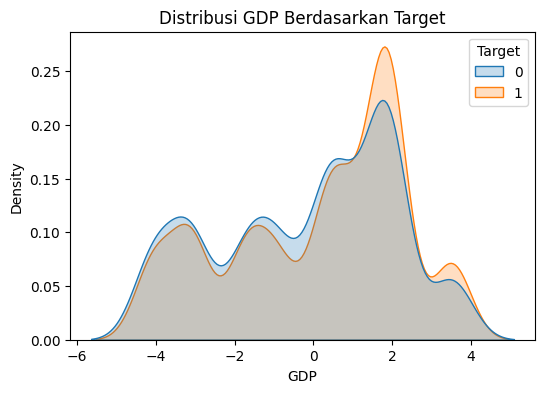

In [12]:
# Visualisasi distribusi data fitur numerik berdasarkan label target
numerical_features = [
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Admission grade",
    "Previous qualification (grade)",
    "GDP"
]

for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df_encoded, x=feature, hue="Target", common_norm=False, fill=True)
    plt.title(f"Distribusi {feature} Berdasarkan Target")
    plt.show()


Pada tahap ini dilakukan visualisasi distribusi data fitur berdasarkan label target, untuk mengetahui fitur mana yang paling berhubungan paling kuat dengan label target.

Analisi Fitur Kategorikal

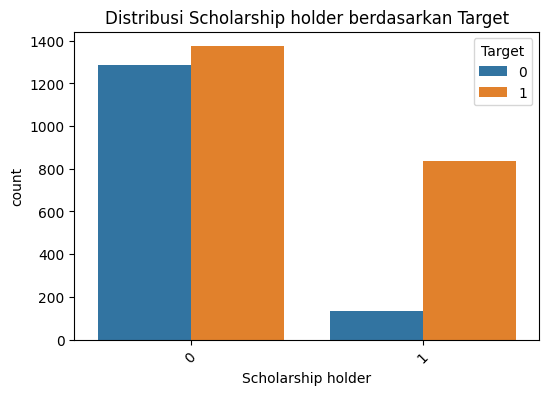

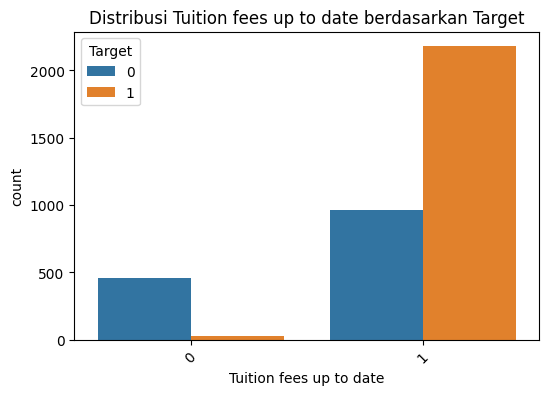

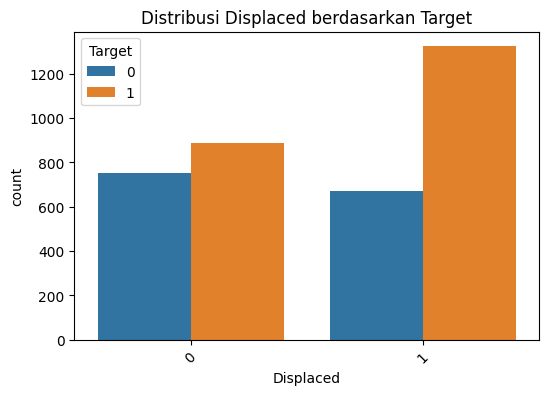

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


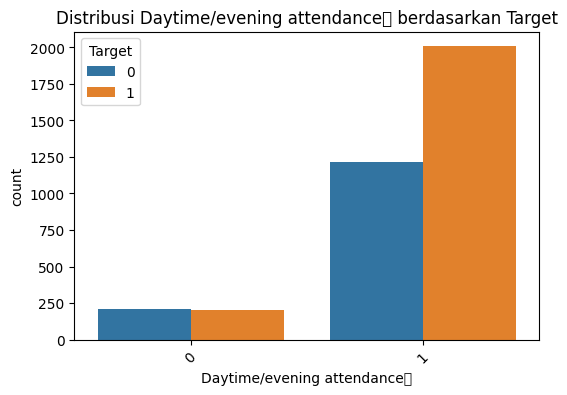

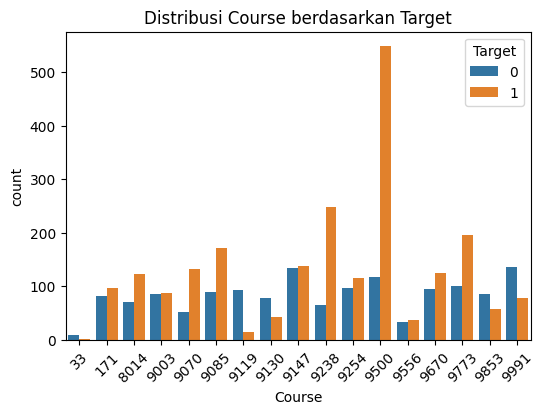

In [13]:
# Visualisasi distribusi data fitur kategorikal berdasarkan label target
categorical_features = [
    "Scholarship holder",
    "Tuition fees up to date",
    "Displaced",
    "Daytime/evening attendance\t",
    "Course"
]

for cat in categorical_features:
    if df_encoded[cat].nunique() < 20:
        plt.figure(figsize=(6,4))
        sns.countplot(x=cat, hue="Target", data=df_encoded)
        plt.title(f"Distribusi {cat} berdasarkan Target")
        plt.xticks(rotation=45)
        plt.show()

Pada tahap ini dilakukan visualisasi distribusi data fitur kategorikal terhadap kolom target.

## Data Preparation

In [14]:
# Cek data null
print("\nTotal Data Null:")
df.isnull().sum()


Total Data Null:


,0
Curricular units 2nd sem (approved),0
Curricular units 2nd sem (grade),0
Curricular units 1st sem (approved),0
Curricular units 1st sem (grade),0
Tuition fees up to date,0
Scholarship holder,0
Curricular units 2nd sem (enrolled),0
Curricular units 1st sem (enrolled),0
Admission grade,0
Displaced,0


In [15]:
# Cek data duplikat
print("\nTotal Data Duplikat:")
df.duplicated().sum()


Total Data Duplikat:


np.int64(0)

### Berdasarkan pengecekan, didapatkan bahwa dataset tidak memiliki data null dan data duplikat.

### Outlier Checking

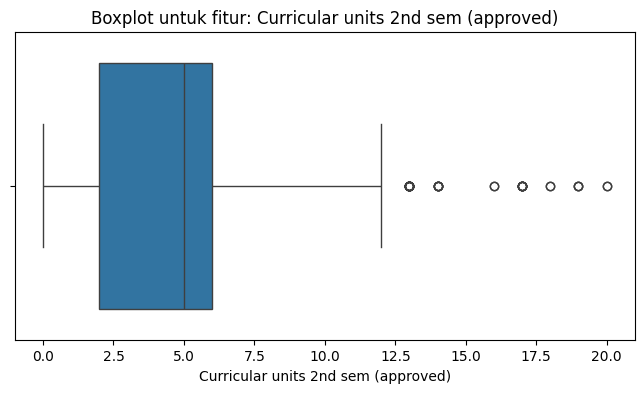

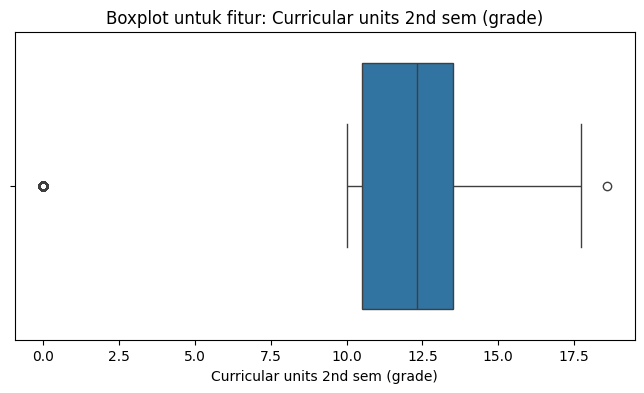

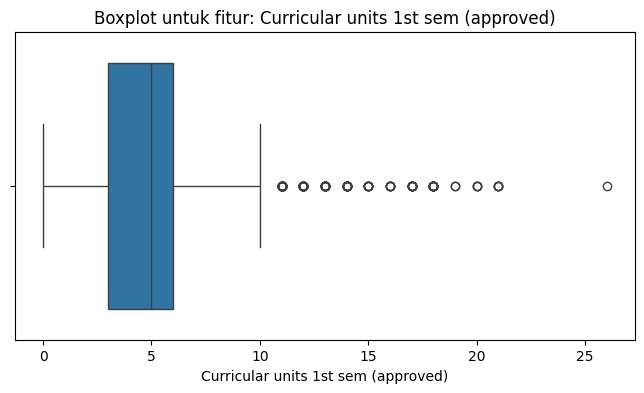

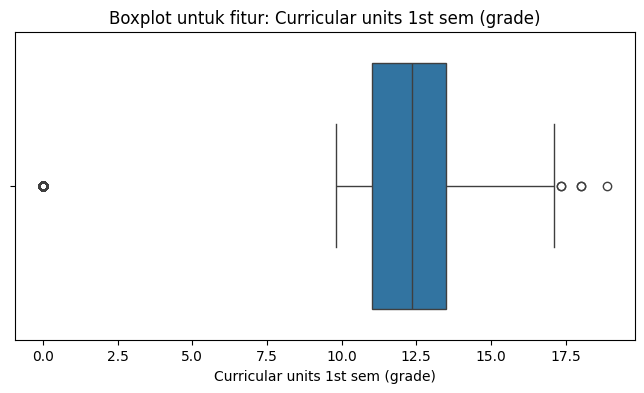

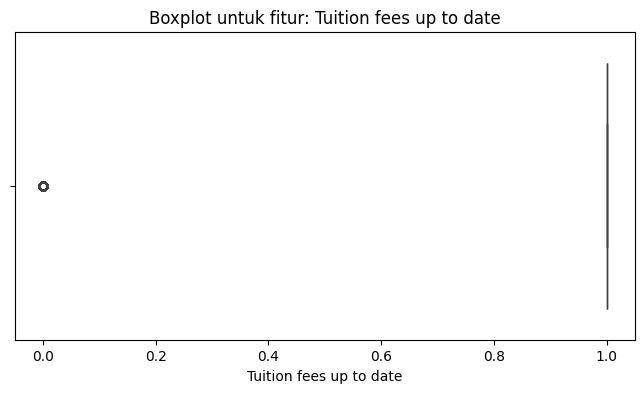

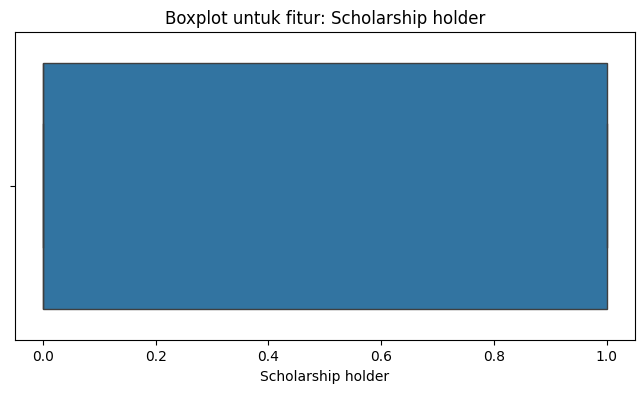

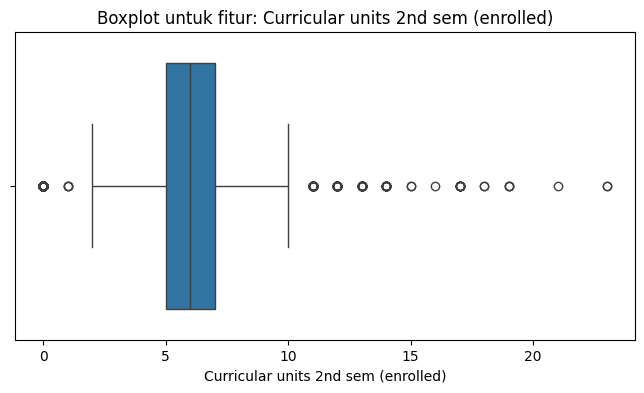

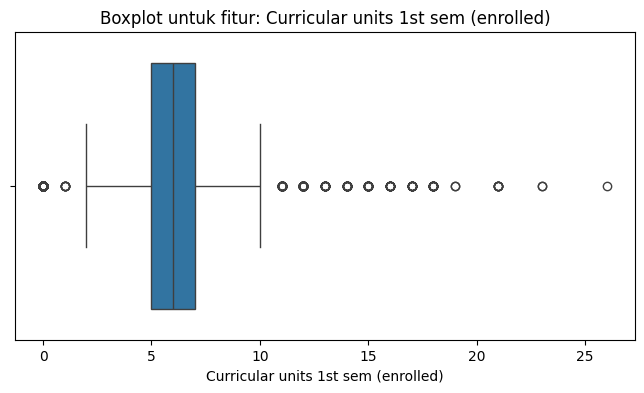

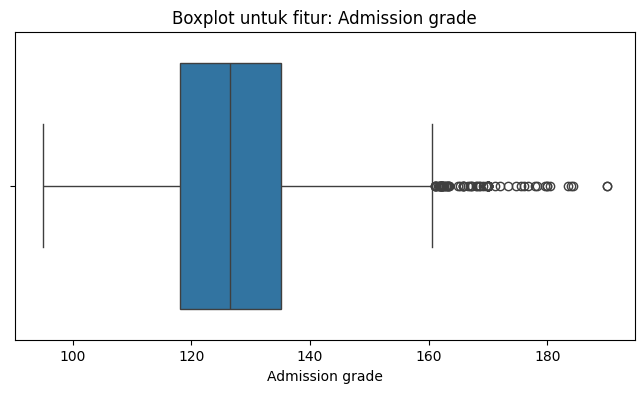

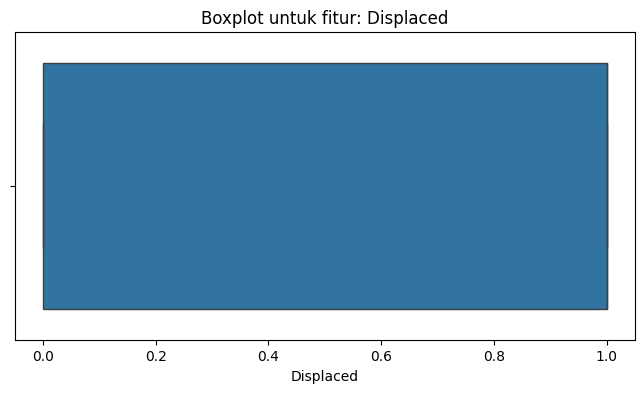

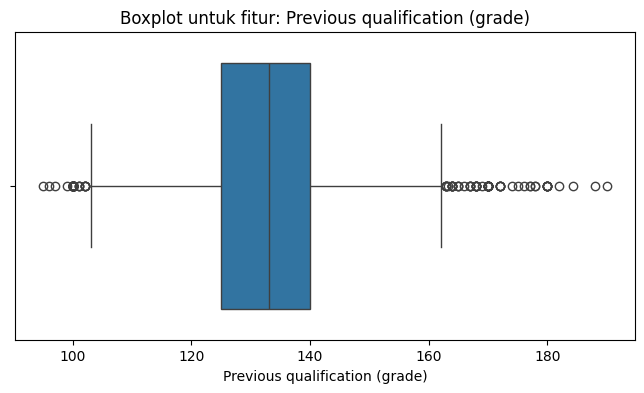

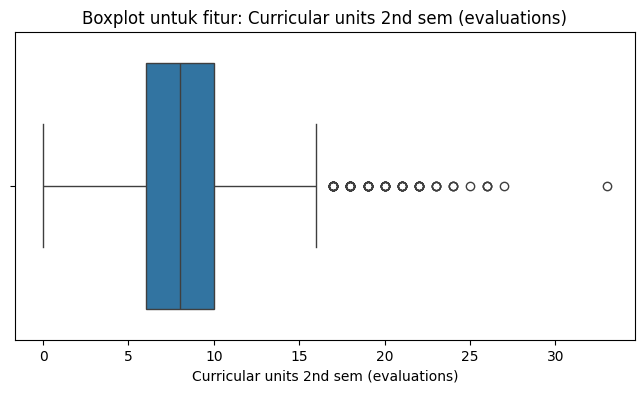

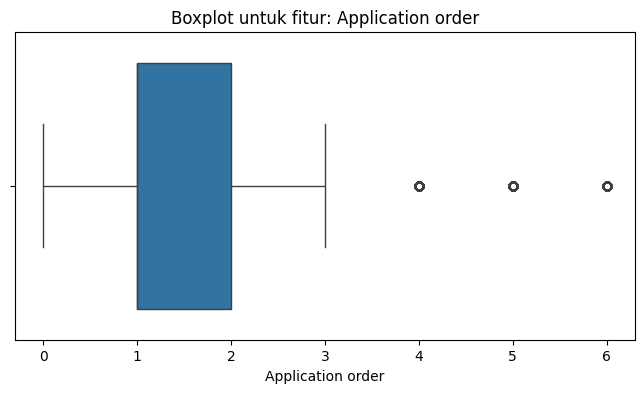

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


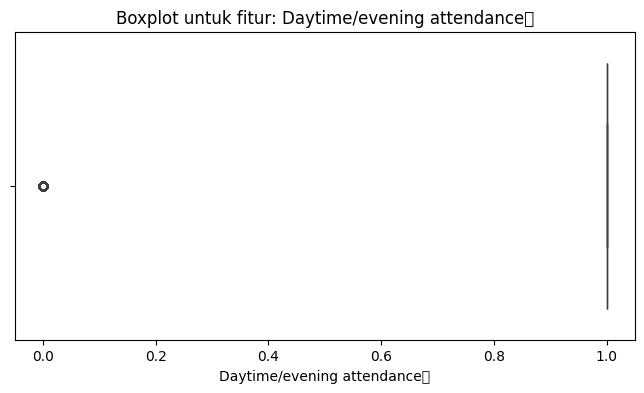

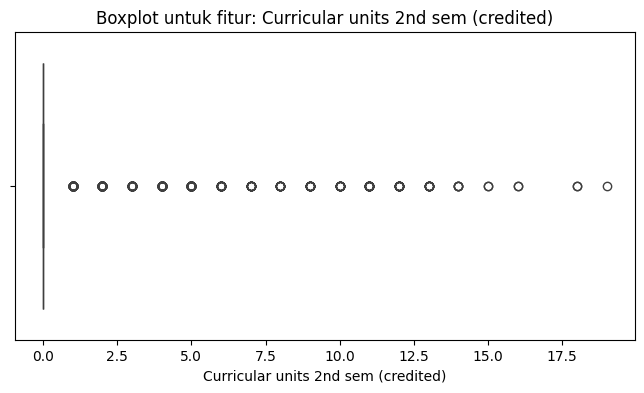

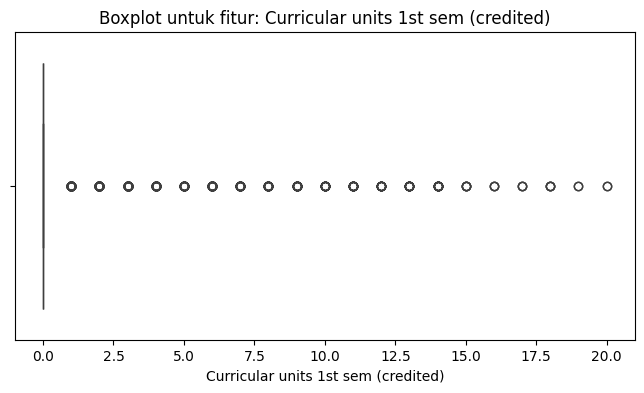

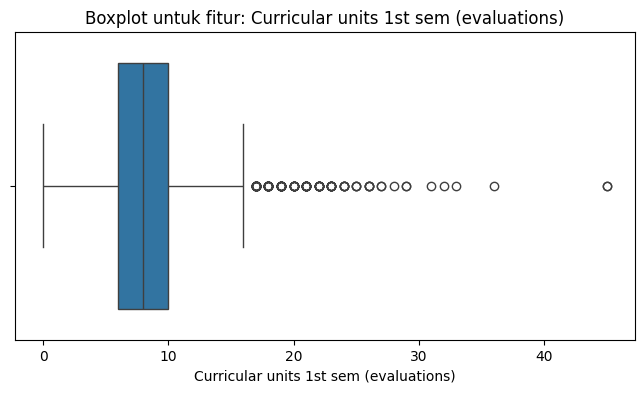

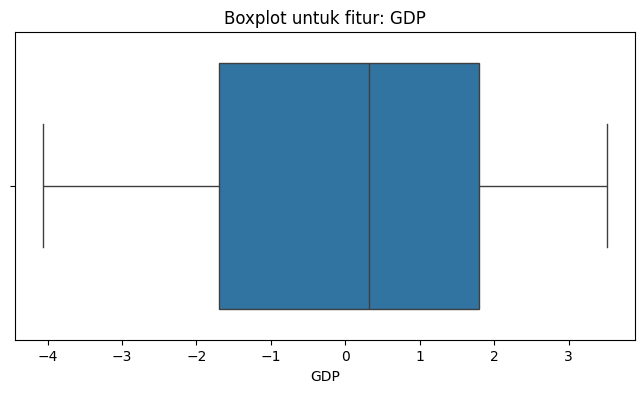

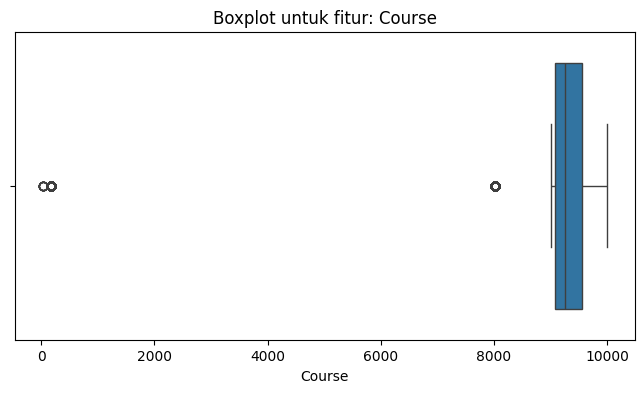

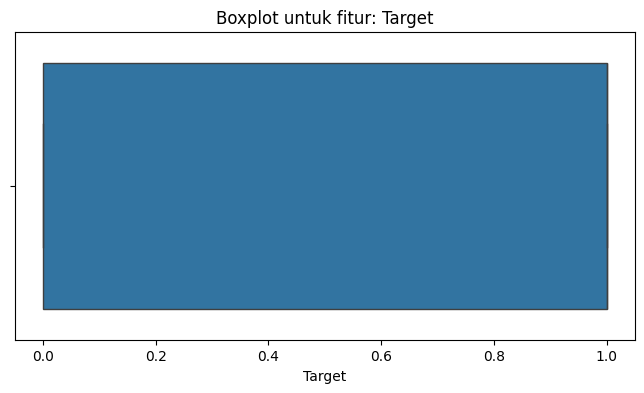

In [16]:
# Pilih fitur numerik
numerical_features = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Visualisasi boxplot per fitur numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_encoded[feature])
    plt.title(f'Boxplot untuk fitur: {feature}')
    plt.xlabel(feature)
    plt.show()


Berdasarkan visualisasi box plot, didapatkan bahwa di beberapa fitur memiliki outlier, namun setelah dilakukan analisa lebih dalam, ada salah satu fitur yang perlu dilakukan penanganan lebih jauh terhadap outlier, agar tidak mempengaruhi model, yaitu fitur Admission grade.

### Outlier handling

In [17]:
# Hitung IQR untuk fitur Admission grade
Q1 = df_encoded['Admission grade'].quantile(0.25)
Q3 = df_encoded['Admission grade'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter: hanya data yang bukan outlier
df_encoded = df_encoded[(df_encoded['Admission grade'] >= lower_bound) &
                        (df_encoded['Admission grade'] <= upper_bound)]

# Cek hasil
print(f"Jumlah data setelah menghapus outlier: {df_encoded.shape[0]}")


Jumlah data setelah menghapus outlier: 3559


Setelah penanganan outlier, didapatkan hasil total data yang dapat digunakan sebanyak 3559 data.

Berikut merupakan visualisasi box plot, setelah outlier handling pada fitur admission grade.

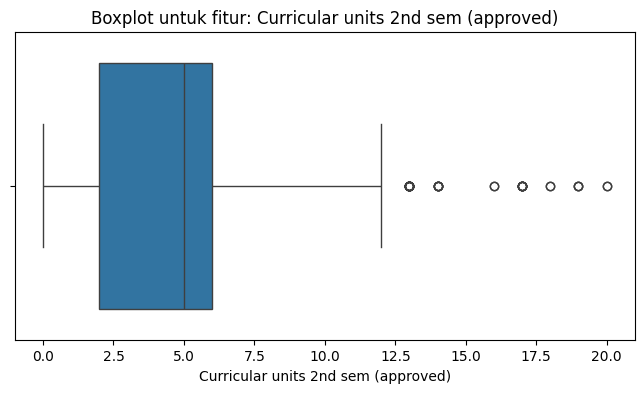

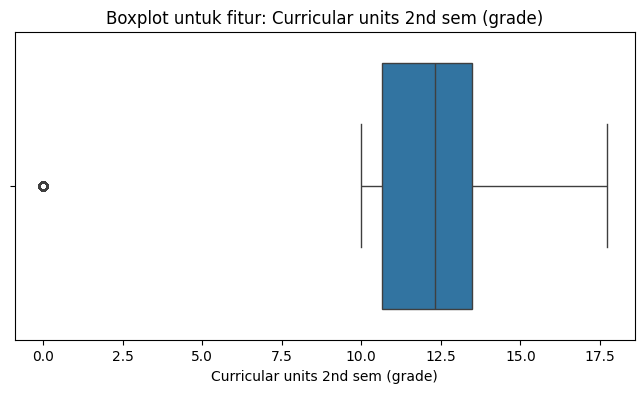

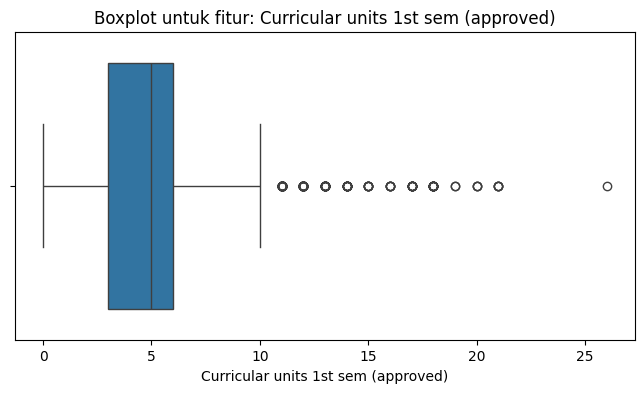

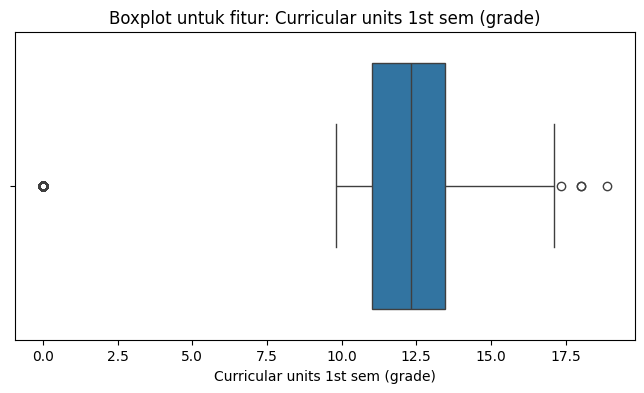

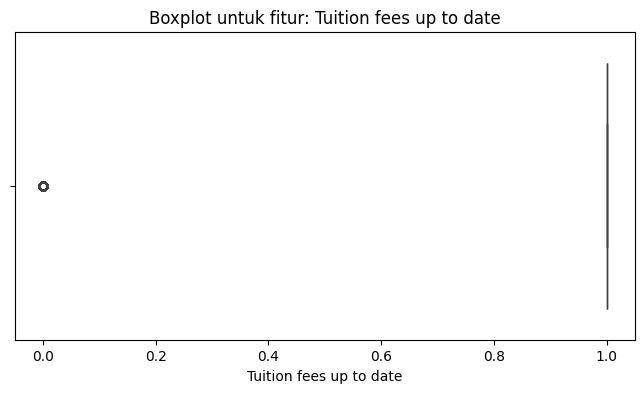

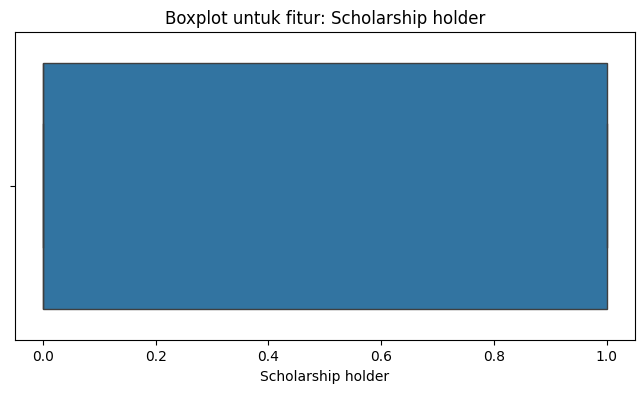

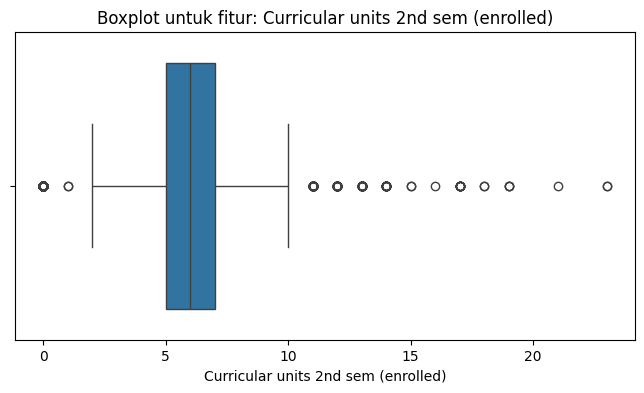

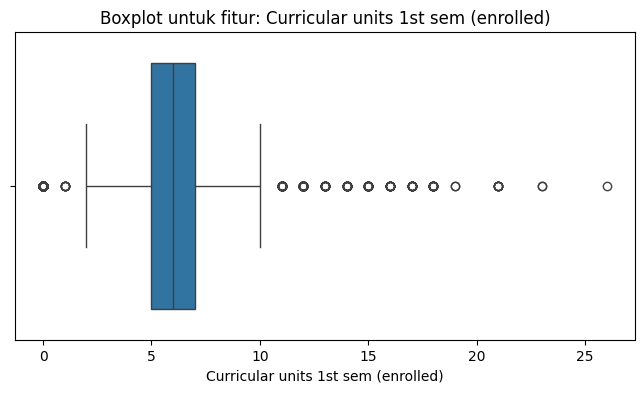

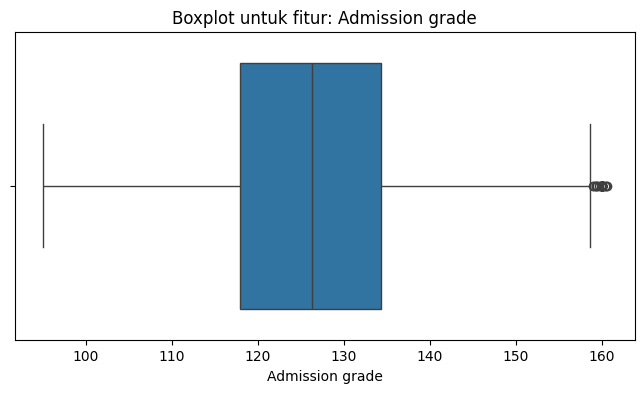

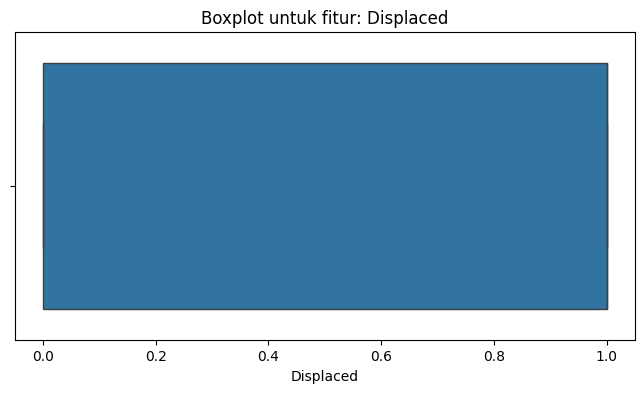

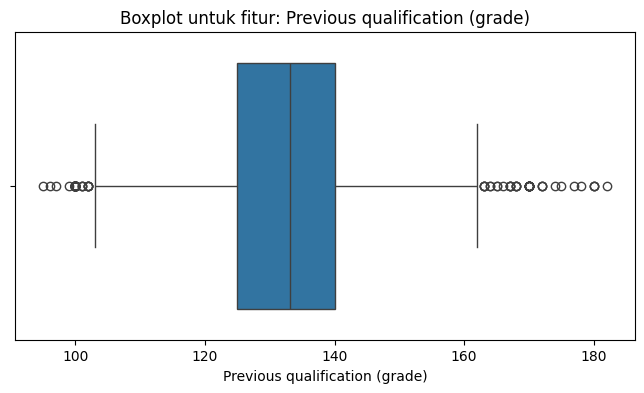

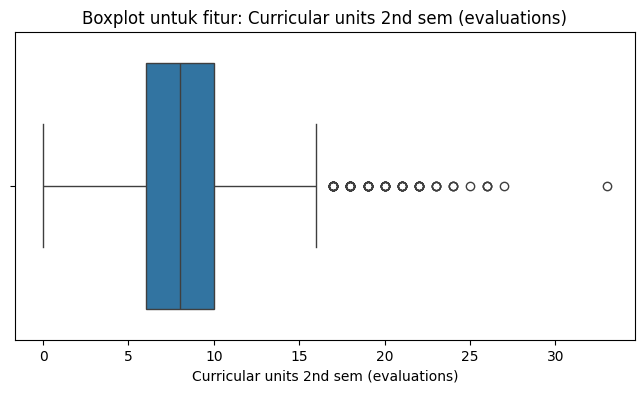

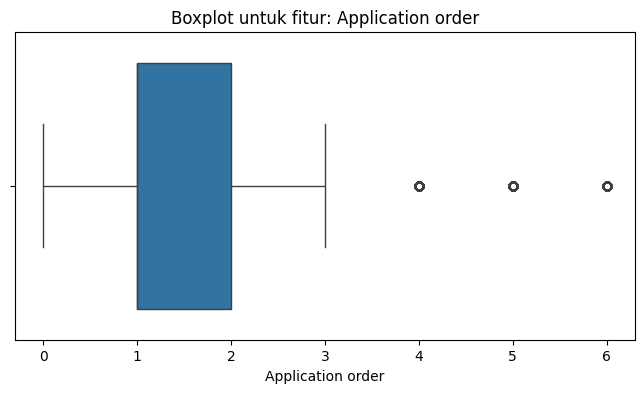

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


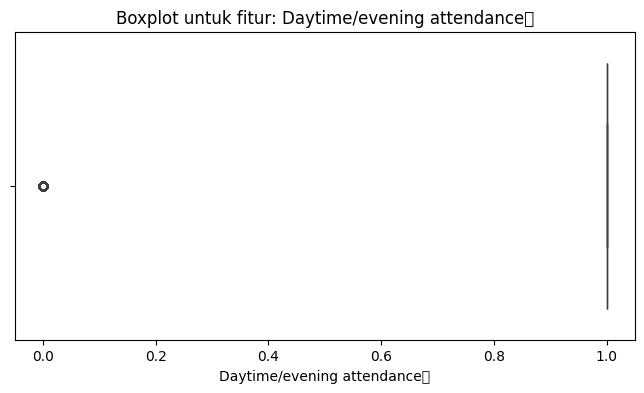

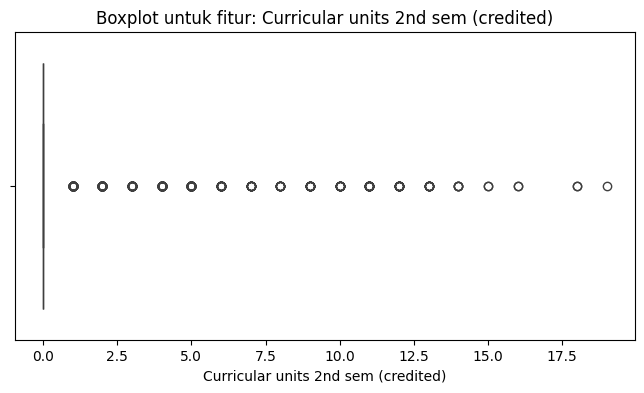

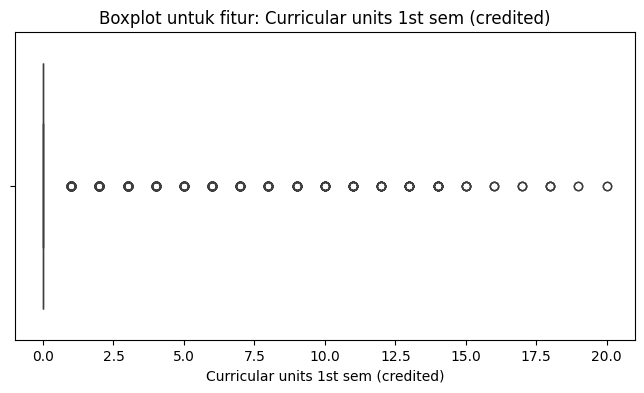

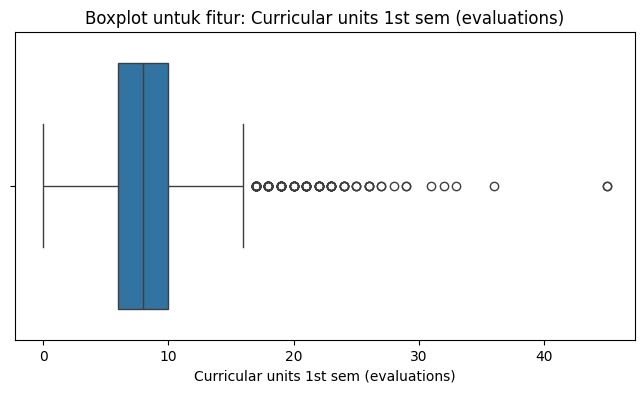

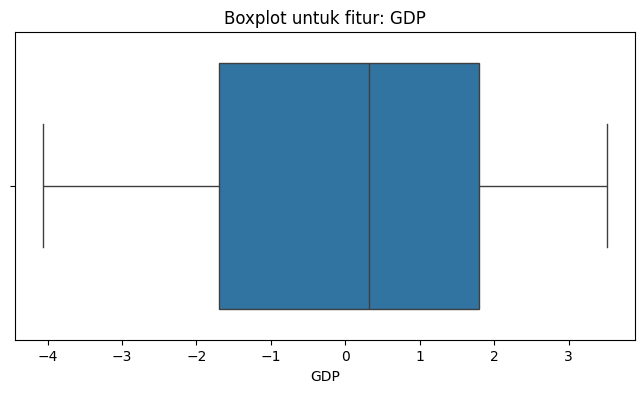

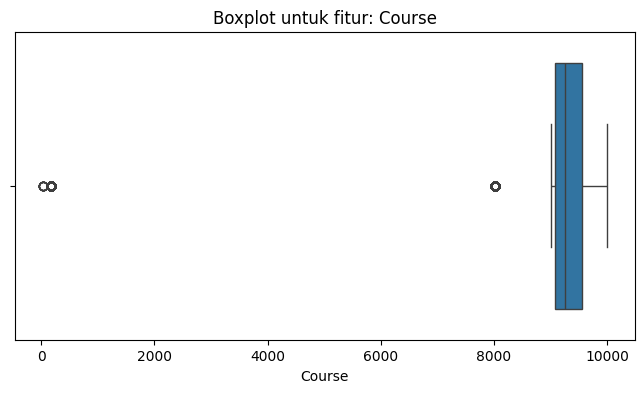

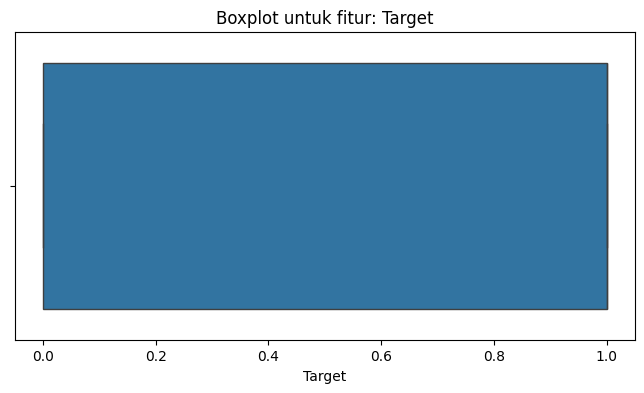

In [18]:
# Mengambil fitur numerik dari df_encoded yang sudah bersih
numerical_features = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Visualisasi boxplot ulang
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_encoded[feature])
    plt.title(f'Boxplot untuk fitur: {feature}')
    plt.xlabel(feature)
    plt.show()

### Data Splitting

In [19]:
# Misal: X adalah fitur, y adalah target
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cek hasil
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (2847, 19)
Ukuran data uji: (712, 19)


Pada bagian ini dilakukan data splitting, menjadi 80:20. dengan kolom target "Target" yang berisikan Graduated & Dropout. dan didapatkan hasil Ukuran data latih: (2847, 19)
Ukuran data uji: (712, 19)

## Modelling

### Modelling

In [20]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}

# Untuk menyimpan hasil evaluasi
results = []

# Train dan evaluasi semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Tampilkan hasil dalam DataFrame
results_df = pd.DataFrame(results)
print("Hasil Evaluasi Model:")
print(results_df.sort_values(by="F1 Score", ascending=False))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hasil Evaluasi Model:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.908708   0.896552  0.960739  0.927536
2        Random Forest  0.905899   0.897826  0.953811  0.924972
3  K-Nearest Neighbors  0.830056   0.812000  0.937644  0.870311
1        Decision Tree  0.844101   0.890777  0.847575  0.868639
4                  SVM  0.608146   0.608146  1.000000  0.756332


Tahap ini adalah proses training dan evaluasi model machine learning. Beberapa algoritma yang digunakan seperti Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, dan Support Vector Machine (SVM) diinisialisasi dan dilatih menggunakan data training (X_train, y_train). Setelah model dilatih, prediksi dilakukan terhadap data uji (X_test), lalu hasil prediksi dibandingkan dengan label asli (y_test) menggunakan metrik evaluasi seperti Accuracy, Precision, Recall, dan F1 Score. Seluruh hasil diekstrak ke dalam bentuk DataFrame untuk dianalisis dan dibandingkan, sehingga dapat diketahui model mana yang memiliki performa terbaik berdasarkan nilai F1 Score.









### Model Optimation

In [21]:
# Parameter grid untuk Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1'
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluasi model terbaik
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)

print("Classification Report (Logistic Regression - Best):")
print(classification_report(y_test, y_pred_best))


Best Parameters: {'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report (Logistic Regression - Best):
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       279
           1       0.90      0.96      0.93       433

    accuracy                           0.91       712
   macro avg       0.92      0.90      0.91       712
weighted avg       0.91      0.91      0.91       712



Tahap ini merupakan tuning hyperparameter untuk model Logistic Regression menggunakan teknik GridSearchCV. GridSearchCV melakukan pencarian kombinasi terbaik dari parameter C, penalty, solver, dan max_iter berdasarkan skor F1 dengan validasi silang sebanyak 5 fold. Setelah menemukan parameter terbaik (best_params_), model terbaik (best_estimator_) digunakan untuk melakukan prediksi pada data uji (X_test).

### Evaluation

Confusion Matrix

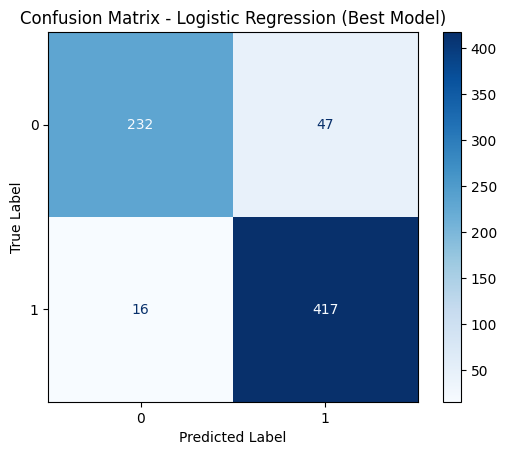

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logreg.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Logistic Regression (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()


Tahap ini dilakukan untuk menampilkan visualisasi confusion matrix dari model Logistic Regression terbaik yang telah diperoleh melalui GridSearch. Confusion matrix memberikan gambaran detail tentang jumlah prediksi benar dan salah dari masing-masing kelas, sehingga memudahkan dalam mengevaluasi kesalahan model (false positives dan false negatives).

Accuracy

In [24]:
print('Accuracy:', accuracy_score(y_test, y_pred_best))


Accuracy: 0.9115168539325843


## Conclusion

Melalui serangkaian tahapan seperti eksplorasi data, visualisasi distribusi fitur, pelatihan berbagai algoritma klasifikasi, dan tuning hyperparameter, diperoleh hasil bahwa model Logistic Regression memberikan performa terbaik.

Model Logistic Regression yang telah di-tuning berhasil mencapai akurasi sebesar 91%, serta menunjukkan performa yang baik pada metrik lain seperti precision, recall, dan F1-score. Model ini tidak hanya sederhana dan efisien, tetapi juga cukup akurat untuk digunakan sebagai dasar dalam sistem pendukung keputusan (decision support system) bagi pihak kampus untuk mengidentifikasi mahasiswa yang berisiko dropout lebih awal.

Dengan hasil ini, model dapat menjadi alat bantu strategis dalam meningkatkan angka kelulusan dan merancang intervensi yang tepat sasaran bagi mahasiswa yang membutuhkan perhatian lebih.